In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.shape

(400, 5)

In [5]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [6]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

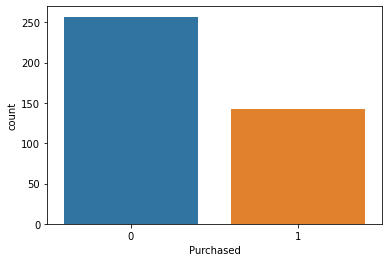

In [7]:
sns.countplot(data=df,x="Purchased")

In [8]:
sns.distplot(df['EstimatedSalary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

In [9]:
sns.pairplot(data=df)

In [10]:
sns.scatterplot(data=df,x='EstimatedSalary',y='Age',hue='Purchased')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

In [11]:
df.drop('User ID',axis=1,inplace=True)

In [12]:
df

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

In [13]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [14]:
df

Age  EstimatedSalary  Purchased  Gender_Male
0     19            19000          0            1
1     35            20000          0            1
2     26            43000          0            0
3     27            57000          0            0
4     19            76000          0            1
..   ...              ...        ...          ...
395   46            41000          1            0
396   51            23000          1            1
397   50            20000          1            0
398   36            33000          0            1
399   49            36000          1            0

[400 rows x 4 columns]

In [15]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [16]:
x

Age  EstimatedSalary  Gender_Male
0     19            19000            1
1     35            20000            1
2     26            43000            0
3     27            57000            0
4     19            76000            1
..   ...              ...          ...
395   46            41000            0
396   51            23000            1
397   50            20000            0
398   36            33000            1
399   49            36000            0

[400 rows x 3 columns]

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [19]:
y.value_counts()

0    257
1    257
Name: Purchased, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [23]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'SVC':SVC(),
    'DT':DecisionTreeClassifier(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBR':XGBClassifier(),
    'NB':GaussianNB()
}

In [24]:
for name,model in models.items():
    print(f'Using:{name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuracy: {accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuracy: {accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision_score : {precision_score(y_test,y_pred)}')
    print(f'f1_score : {f1_score(y_test,y_pred)}')
    print(f'fbeta_score : {fbeta_score(y_test,y_pred,beta=0.5)}')
    print("=====================================================================================")

Using:LR
train accuracy: 0.8394160583941606
test accuracy: 0.883495145631068
recall: 0.875
precision_score : 0.9074074074074074
f1_score : 0.8909090909090909
fbeta_score : 0.9007352941176471
Using:KNN
train accuracy: 0.9221411192214112
test accuracy: 0.9320388349514563
recall: 0.9285714285714286
precision_score : 0.9454545454545454
f1_score : 0.9369369369369368
fbeta_score : 0.9420289855072466
Using:SVC
train accuracy: 0.9075425790754258
test accuracy: 0.9223300970873787
recall: 0.9285714285714286
precision_score : 0.9285714285714286
f1_score : 0.9285714285714286
fbeta_score : 0.9285714285714286
Using:DT
train accuracy: 0.9975669099756691
test accuracy: 0.9029126213592233
recall: 0.8928571428571429
precision_score : 0.9259259259259259
f1_score : 0.9090909090909091
fbeta_score : 0.9191176470588235
Using:RF
train accuracy: 0.9975669099756691
test accuracy: 0.9029126213592233
recall: 0.8928571428571429
precision_score : 0.9259259259259259
f1_score : 0.9090909090909091
fbeta_score : 0.9191

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train accuracy: 0.9902676399026764
test accuracy: 0.912621359223301
recall: 0.9107142857142857
precision_score : 0.9272727272727272
f1_score : 0.918918918918919
fbeta_score : 0.9239130434782609
Using:NB
train accuracy: 0.8880778588807786
test accuracy: 0.9223300970873787
recall: 0.9107142857142857
precision_score : 0.9444444444444444
f1_score : 0.9272727272727271
fbeta_score : 0.9375000000000001


[19:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

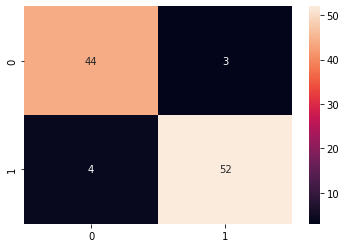

In [25]:
model=XGBClassifier(n_estimators=70)
model.fit(x_train,y_train)
ypred=model.predict(x_test)
cc=confusion_matrix(y_test,ypred)
sns.heatmap(cc,annot=True)


In [26]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
import joblib
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')
joblib.dump(x.columns,'features.h5')

['features.h5']